In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import io from StringIO
from pathlib import Path

In [11]:
df = pd.read_csv('real_estate_db.csv', encoding='latin1' )

In [12]:
df.columns

Index(['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID', 'state',
       'state_ab', 'city', 'place', 'type', 'primary', 'zip_code', 'area_code',
       'lat', 'lng', 'ALand', 'AWater', 'pop', 'male_pop', 'female_pop',
       'rent_mean', 'rent_median', 'rent_stdev', 'rent_sample_weight',
       'rent_samples', 'rent_gt_10', 'rent_gt_15', 'rent_gt_20', 'rent_gt_25',
       'rent_gt_30', 'rent_gt_35', 'rent_gt_40', 'rent_gt_50',
       'universe_samples', 'used_samples', 'hi_mean', 'hi_median', 'hi_stdev',
       'hi_sample_weight', 'hi_samples', 'family_mean', 'family_median',
       'family_stdev', 'family_sample_weight', 'family_samples',
       'hc_mortgage_mean', 'hc_mortgage_median', 'hc_mortgage_stdev',
       'hc_mortgage_sample_weight', 'hc_mortgage_samples', 'hc_mean',
       'hc_median', 'hc_stdev', 'hc_samples', 'hc_sample_weight',
       'home_equity_second_mortgage', 'second_mortgage', 'home_equity', 'debt',
       'second_mortgage_cdf', 'home_equity_cdf', 'debt_cdf', '

In [13]:
# df.drop(columns=['UID', 'BLOCKID', 'SUMLEVEL', 'COUNTYID', 'STATEID','primary',  'lat', 'lng', 'ALand', 'AWater',], inplace=True)

In [16]:
# Group the DataFrame by 'state_ab'
grouped = df.groupby('state_ab')

# Calculate the average income of the population by states
average_income_by_state = grouped['hi_mean'].mean()

In [17]:
average_income_by_state

state_ab
AK    83541.334071
AL    55919.913444
AR    55027.720981
AZ    66474.487841
CA    82014.309082
CO    79159.770834
CT    92807.007265
DC    90667.269509
DE    74435.832252
FL    63868.753519
GA    64097.469013
HI    86366.217302
IA    63735.194683
ID    60020.305956
IL    72336.517444
IN    59845.439084
KS    64788.990488
KY    56963.486171
LA    59312.039004
MA    87218.963829
MD    92755.501336
ME    61978.043037
MI    63297.928578
MN    75821.662274
MO    62061.403470
MS    50920.375239
MT    60598.420766
NC    63556.858261
ND    69608.640140
NE    68401.362503
NH    82587.122456
NJ    91777.357894
NM    61163.333599
NV    67913.266798
NY    78367.223173
OH    62265.751619
OK    59357.674295
OR    67380.899043
PA    69082.243171
PR    28914.975839
RI    75862.806354
SC    58800.693545
SD    63506.930404
TN    60004.293917
TX    69301.163388
UT    76134.667218
VA    86203.310838
VT    67835.135237
WA    76292.649706
WI    64952.289490
WV    54518.852436
WY    71906.981372
Nam

In [18]:
income_related_columns = [
    'state_ab',
    'hi_mean',
    'hi_median',
    'hi_stdev',
    'hi_sample_weight',
    'hi_samples',
    # Add other income-related columns here if needed
]

# Filter the DataFrame to include only the income-related columns
income_data = df[income_related_columns]

In [19]:
income_data

,state_ab,hi_mean,hi_median,hi_stdev,hi_sample_weight,hi_samples
0,AK,107394.63092,92807.0,70691.05352,329.85389,874.0
1,AK,136547.39117,119141.0,84268.79529,288.40934,1103.0
2,AK,69361.23167,57976.0,45054.38537,1104.22753,1955.0
3,AK,66790.89936,48230.0,59069.63484,562.35527,902.0
4,AK,76752.81635,66459.0,53486.53205,1015.66547,2065.0
...,...,...,...,...,...,...
39025,WY,102923.81690,81817.0,74424.93521,1199.56088,2950.0
39026,WY,77201.06774,71128.0,53189.61572,1243.99078,2435.0
39027,WY,46112.65105,32883.0,43138.48563,868.82474,1198.0
39028,WY,80755.40868,69215.0,58346.71855,668.00471,1393.0


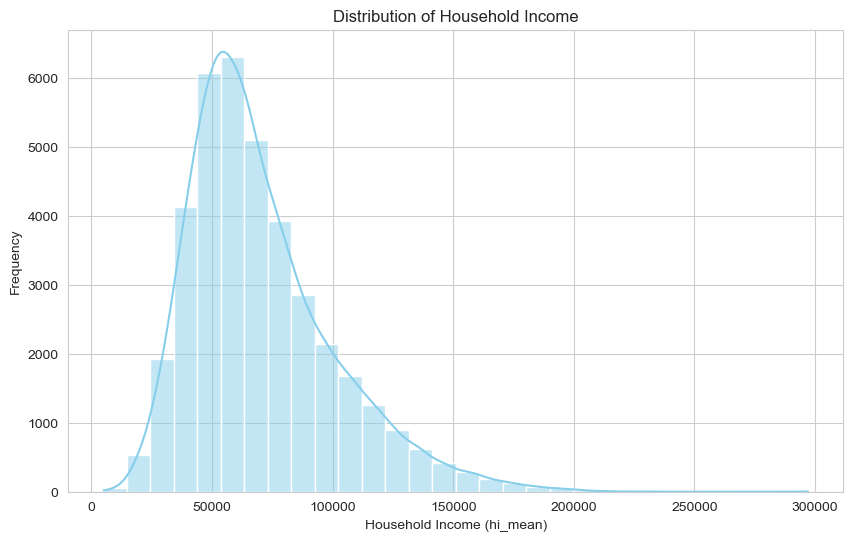

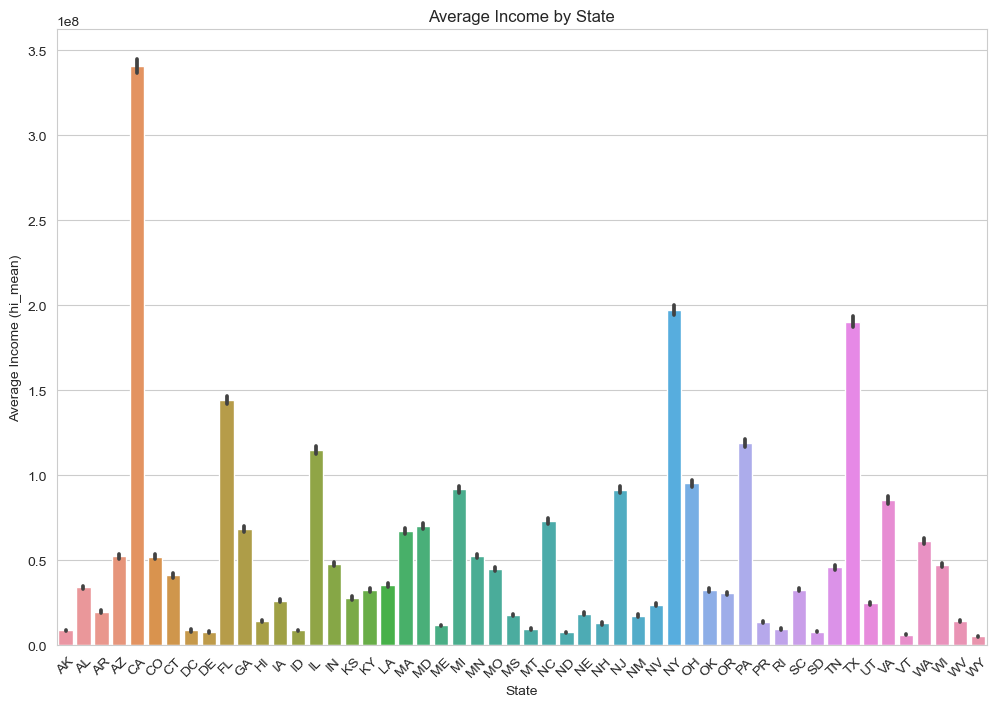

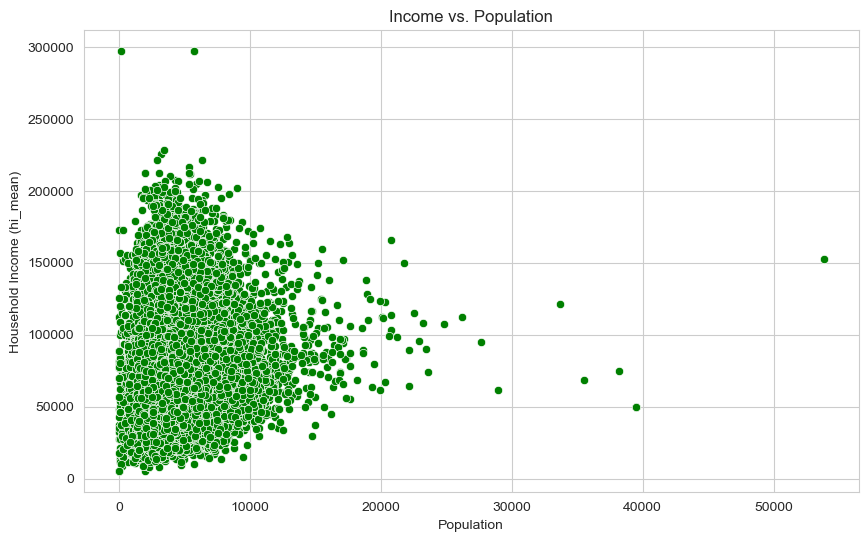

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set_style("whitegrid")

# Histogram of Household Income (hi_mean)
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='hi_mean', bins=30, kde=True, color='skyblue')
plt.title('Distribution of Household Income')
plt.xlabel('Household Income (hi_mean)')
plt.ylabel('Frequency')
plt.show()

# Bar Chart of Average Income by State
plt.figure(figsize=(12, 8))
sns.barplot(data=df, x='state_ab', y='hi_mean', estimator=sum)
plt.title('Average Income by State')
plt.xlabel('State')
plt.ylabel('Average Income (hi_mean)')
plt.xticks(rotation=45)
plt.show()

# Scatter Plot of Income vs. Population
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pop', y='hi_mean', color='green')
plt.title('Income vs. Population')
plt.xlabel('Population')
plt.ylabel('Household Income (hi_mean)')
plt.show()
